In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(0)

In [4]:
m=100

In [5]:
X=np.linspace(0,4,m).reshape((m,1))
y=2+X**1.3+np.random.randn(m,1)
y=y.ravel()

Text(0, 0.5, 'y')

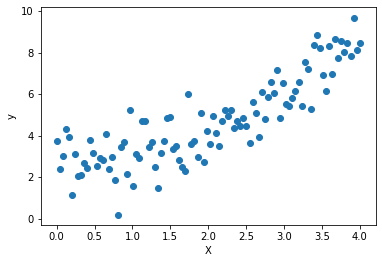

In [7]:
%matplotlib inline
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model=LinearRegression()

In [10]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
y_pred=model.predict(X)

Text(0, 0.5, 'y')

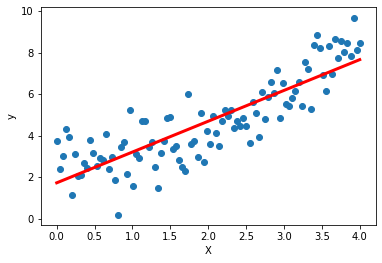

In [12]:
plt.scatter(X,y)
plt.plot(X,y_pred,c='red',lw=3)
plt.xlabel('X')
plt.ylabel('y')

In [13]:
from sklearn.metrics import mean_absolute_error

In [14]:
mae=mean_absolute_error(y,y_pred)

In [15]:
mae

0.8739397321740953

Text(0, 0.5, 'y')

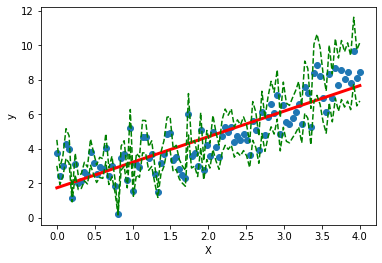

In [16]:
plt.scatter(X,y)
plt.plot(X,y_pred,c='red',lw=3)
plt.plot(X,y+0.2*y,c='green',ls='--')
plt.plot(X,y-0.2*y,c='green',ls='--')
plt.xlabel('X')
plt.ylabel('y')

In [17]:
def custom_metric(y,y_pred) :
    return np.sum((y_pred<y+0.2*y)&(y_pred>y-0.2*y))/y.size

In [18]:
custom_metric(y,y_pred)

0.63

In [19]:
from sklearn.metrics import make_scorer

In [20]:
custom_score=make_scorer(custom_metric,greater_is_better=True)

In [21]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [22]:
cross_val_score(model,X,y,cv=3,scoring=custom_score)

array([0.08823529, 0.42424242, 0.3030303 ])

In [23]:
from sklearn.svm import SVR

In [24]:
model2=SVR(kernel='rbf',degree=3)

In [25]:
params={'gamma':np.arange(0.1,1,0.05)}

In [26]:
grid=GridSearchCV(model2,params,cv=3,scoring=custom_score)

In [27]:
grid.fit(X,y)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(custom_metric), verbose=0)

In [28]:
best_model=grid.best_estimator_

In [29]:
best_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma=0.15000000000000002, kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [30]:
y_pred=best_model.predict(X)

In [31]:
custom_metric(y,y_pred)

0.64

In [32]:
%matplotlib
plt.scatter(X,y)
plt.plot(X,y_pred,c='red',lw=3)
plt.plot(X,y+0.2*y,c='green',ls='--')
plt.plot(X,y-0.2*y,c='green',ls='--')
plt.xlabel('X')
plt.ylabel('y')

Using matplotlib backend: MacOSX


Text(0, 0.5, 'y')